## Analysis on the E-Commerce Dataset from the UCI Machine Learning Repository. 

From knowing which products to buy, how many of them and when, to marketing the right products to the right customers at the right time, there are plenty of uses for data in retail - from the biggest multi-nationals to the smallest, single-outlet shop. By analysing customer purchase and product sales history, we can group products and customers into groups that behave similarly, and make data-driven business decisions that can improve a wide range of inventory and sales key performance indicators (KPIs).

### Link for dataset

https://www.kaggle.com/carrie1/ecommerce-data

In [1]:
library(readr)

Warning message:
"package 'readr' was built under R version 3.6.3"

In [2]:
custData <- read_csv("data.csv")


-- Column specification --------------------------------------------------------
cols(
  InvoiceNo = col_character(),
  StockCode = col_character(),
  Description = col_character(),
  Quantity = col_double(),
  InvoiceDate = col_character(),
  UnitPrice = col_double(),
  CustomerID = col_double(),
  Country = col_character()
)



In [3]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [4]:
library(data.table)

Warning message:
"package 'data.table' was built under R version 3.6.3"

In [5]:
#Data glimpse
library(dplyr)
glimpse(custData)
dim(custData)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Rows: 541,909
Columns: 8
$ InvoiceNo   <chr> "536365", "536365", "536365", "536365", "536365", "536365"~
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752", ~
$ Description <chr> "WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN~
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, 3, ~
$ InvoiceDate <chr> "12/1/2010 8:26", "12/1/2010 8:26", "12/1/2010 8:26", "12/~
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1.69~
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17~
$ Country     <chr> "United Kingdom", "United Kingdom", "United Kingdom", "Uni~


[1] 541909      8

In [6]:
options(repr.plot.width=8, repr.plot.height=3)

In [7]:
library(dplyr)

In [8]:
#install.packages('DT')

In [9]:
install.packages('Rcpp', dependencies = TRUE)
#install.packages('ggplot2', dependencies = TRUE)
#install.packages('data.table', dependencies = TRUE)

package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\DELL\anaconda3\envs\r-tutoria\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\DELL\anaconda3\envs\r-tutoria\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"


The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpGuo5jr\downloaded_packages


In [10]:

#install.packages("data.table")


In [11]:
install.packages("Rcpp")

package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\DELL\anaconda3\envs\r-tutoria\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\DELL\anaconda3\envs\r-tutoria\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"


The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpGuo5jr\downloaded_packages


In [12]:
library(Rcpp)

In [13]:
#Remove missing values
custData <- na.omit(custData)
dim(custData)

[1] 406829      8

In [14]:
# separate date and time components of invoice date
custData$date <- sapply(custData$InvoiceDate, FUN = function(x) {strsplit(x, split = '[ ]')[[1]][1]})
custData$time <- sapply(custData$InvoiceDate, FUN = function(x) {strsplit(x, split = '[ ]')[[1]][2]})

In [15]:
# create month, year and hour of day variables
custData$month <- sapply(custData$date, FUN = function(x) {strsplit(x, split = '[/]')[[1]][1]})
custData$year <- sapply(custData$date, FUN = function(x) {strsplit(x, split = '[/]')[[1]][3]})
custData$hourOfDay <- sapply(custData$time, FUN = function(x) {strsplit(x, split = '[:]')[[1]][1]})

In [16]:
head(custData, n =5)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,month,year,hourOfDay
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,12/1/2010,8:26,12,2010,8
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,12/1/2010,8:26,12,2010,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,12/1/2010,8:26,12,2010,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,12/1/2010,8:26,12,2010,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,12/1/2010,8:26,12,2010,8


In [17]:
custData$date <- as.Date(custData$date, "%m/%d/%Y")

In [18]:
#We have converted the date variable to a date class, we can create a new variable that tells us the day of the week, using the wday function from the lubridate package
library(lubridate)
custData$dayOfWeek <- wday(custData$date, label=TRUE)


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



In [19]:
# calculate the line total 
custData <- custData %>% mutate(lineTotal = Quantity * UnitPrice)

In [20]:
head(custData)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,month,year,hourOfDay,dayOfWeek,lineTotal
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01,8:26,12,2010,8,Wed,15.30
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,8:26,12,2010,8,Wed,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01,8:26,12,2010,8,Wed,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,8:26,12,2010,8,Wed,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,8:26,12,2010,8,Wed,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,2010-12-01,8:26,12,2010,8,Wed,15.30


In [21]:
#summary analyses
# Turn the appropriate variables into factors
custData$Country <- as.factor(custData$Country)
custData$month <- as.factor(custData$month)
custData$year <- as.factor(custData$year)
levels(custData$year) <- c(2010,2011)
custData$hourOfDay <- as.factor(custData$hourOfDay)
custData$dayOfWeek <- as.factor(custData$dayOfWeek)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


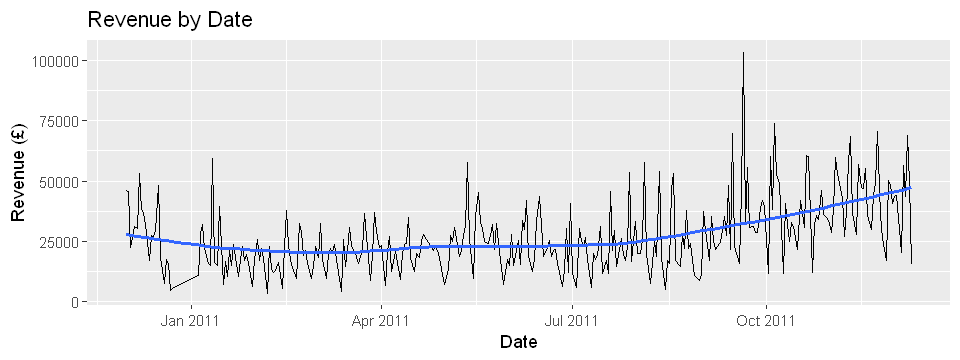

In [22]:
#'big picture' aspects of the dataset
options(repr.plot.width=8, repr.plot.height=3)
custData %>%
  group_by(date) %>%
  summarise(revenue = sum(lineTotal)) %>%
  ggplot(aes(x = date, y = revenue)) + geom_line() + geom_smooth(method = 'auto', se = FALSE) + labs(x = 'Date', y = 'Revenue (£)', title = 'Revenue by Date')

Sales are trending up, so that is a good sign, but that does not really generate any actionable insight

## Day of week analysis

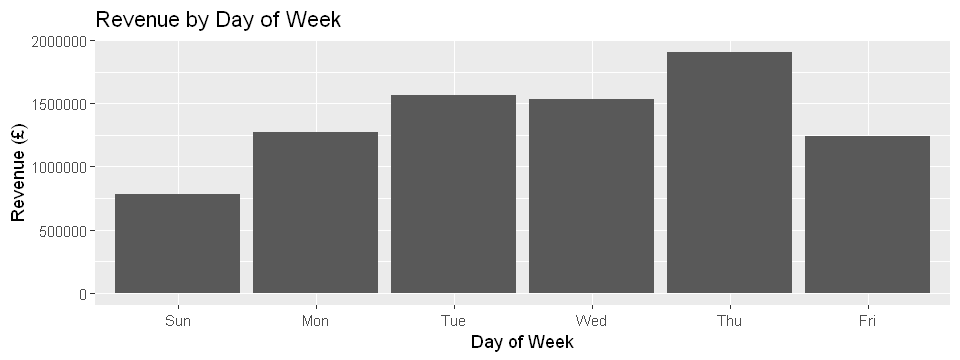

In [23]:
#Analysis of days of the week side of our data
custData %>%
  group_by(dayOfWeek) %>%
  summarise(revenue = sum(lineTotal)) %>%
  ggplot(aes(x = dayOfWeek, y = revenue)) + geom_col() + labs(x = 'Day of Week', y = 'Revenue (£)', title = 'Revenue by Day of Week')

In [24]:
#Creating a new dataframe that we can use to look at what's going on at the day of the week level in a bit more detail:
weekdaySummary <- custData %>%
  group_by(date, dayOfWeek) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup()

head(weekdaySummary, n = 10)

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.


date,dayOfWeek,revenue,transactions,aveOrdVal
2010-12-01,Wed,46051.26,127,362.61
2010-12-02,Thu,45775.43,160,286.10
2010-12-03,Fri,22598.46,64,353.10
2010-12-05,Sun,31380.60,94,333.84
2010-12-06,Mon,30465.08,111,274.46
2010-12-07,Tue,53125.99,79,672.48
2010-12-08,Wed,38048.68,134,283.95
2010-12-09,Thu,37177.85,132,281.65
2010-12-10,Fri,32005.35,78,410.32
2010-12-12,Sun,17217.62,50,344.35


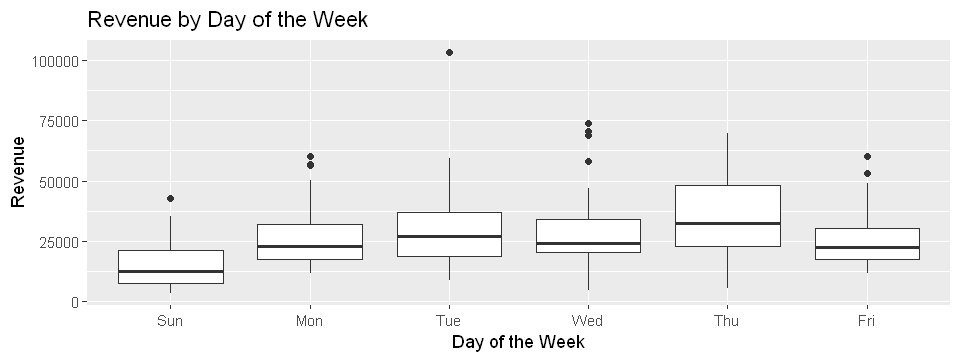

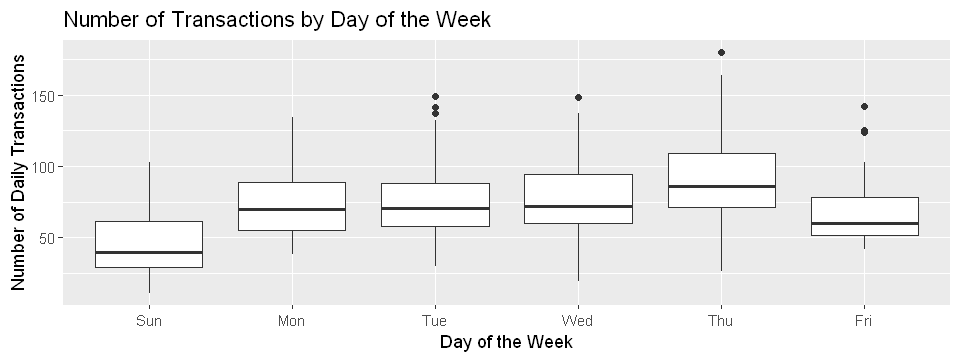

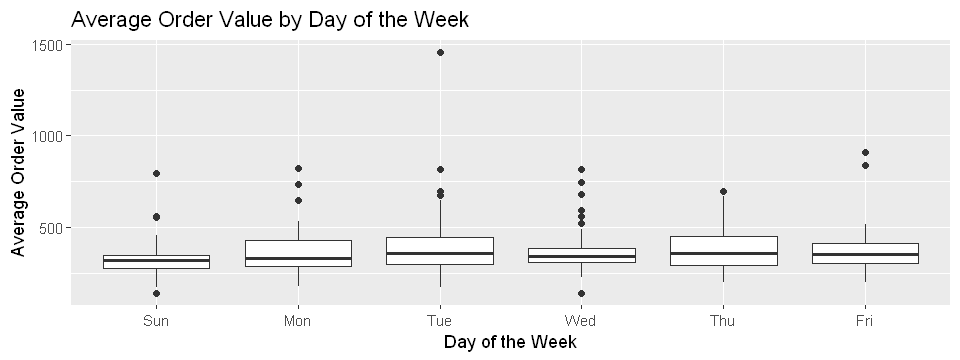

In [25]:
ggplot(weekdaySummary, aes(x = dayOfWeek, y = revenue)) + geom_boxplot() + labs(x = 'Day of the Week', y = 'Revenue', title = 'Revenue by Day of the Week')
ggplot(weekdaySummary, aes(x = dayOfWeek, y = transactions)) + geom_boxplot() + labs(x = 'Day of the Week', y = 'Number of Daily Transactions', title = 'Number of Transactions by Day of the Week')
ggplot(weekdaySummary, aes(x = dayOfWeek, y = aveOrdVal)) + geom_boxplot() + labs(x = 'Day of the Week', y = 'Average Order Value', title = 'Average Order Value by Day of the Week')

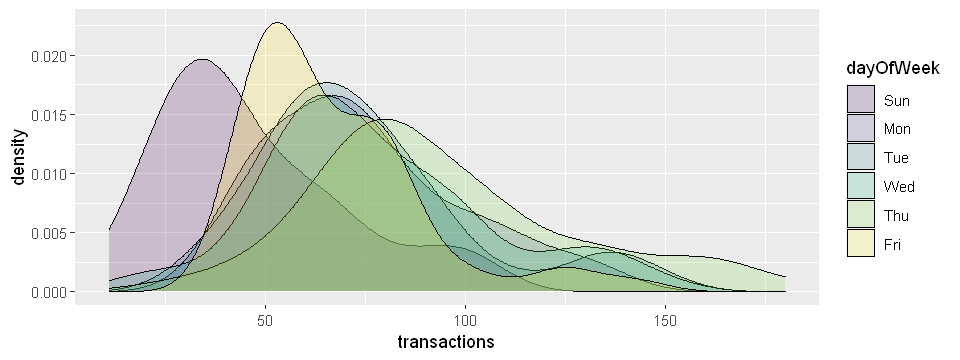

In [26]:
# plot the data as a density plot to get a better feel for how these data are distributed
ggplot(weekdaySummary, aes(transactions, fill = dayOfWeek)) + geom_density(alpha = 0.2)

In [27]:
#There appears to be a reasonable amount of skewness in our distributions, so we'll use a non-parametric test to look for statistically significant differences in our data.
kruskal.test(transactions ~ dayOfWeek, data = weekdaySummary)


	Kruskal-Wallis rank sum test

data:  transactions by dayOfWeek
Kruskal-Wallis chi-squared = 71.744, df = 5, p-value = 4.441e-14


In [28]:
install.packages("agricolae")

package 'agricolae' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpGuo5jr\downloaded_packages


In [29]:
#Using the kruskal function from the agricolae package, we can look to see which days are significantly different from the others
library(agricolae)
kruskal(weekdaySummary$transactions, weekdaySummary$dayOfWeek, console = TRUE)

Warning message:
"package 'agricolae' was built under R version 3.6.3"


Study: weekdaySummary$transactions ~ weekdaySummary$dayOfWeek
Kruskal-Wallis test's
Ties or no Ties

Critical Value: 71.7443
Degrees of freedom: 5
Pvalue Chisq  : 4.440892e-14 

weekdaySummary$dayOfWeek,  means of the ranks

    weekdaySummary.transactions  r
Fri                    135.0100 50
Mon                    162.4574 47
Sun                     72.3600 50
Thu                    213.5000 53
Tue                    160.0769 52
Wed                    170.2170 53

Post Hoc Analysis

t-Student: 1.96793
Alpha    : 0.05
Groups according to probability of treatment differences and alpha level.

Treatments with the same letter are not significantly different.

    weekdaySummary$transactions groups
Thu                    213.5000      a
Wed                    170.2170      b
Mon                    162.4574     bc
Tue                    160.0769     bc
Fri                    135.0100      c
Sun                     72.3600      d


### Conclusion
We can see that there are statistically significant differences in the number of transactions that take place on different days of the week, with Sunday having the lowest number of transactions, and Thursday the highest. As the average order value remains relatively consistent, this translates to differences in revenue.

## Hour of day analysis

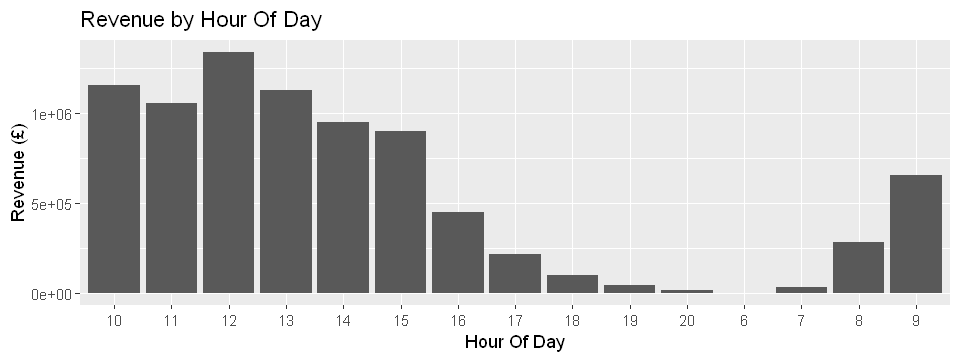

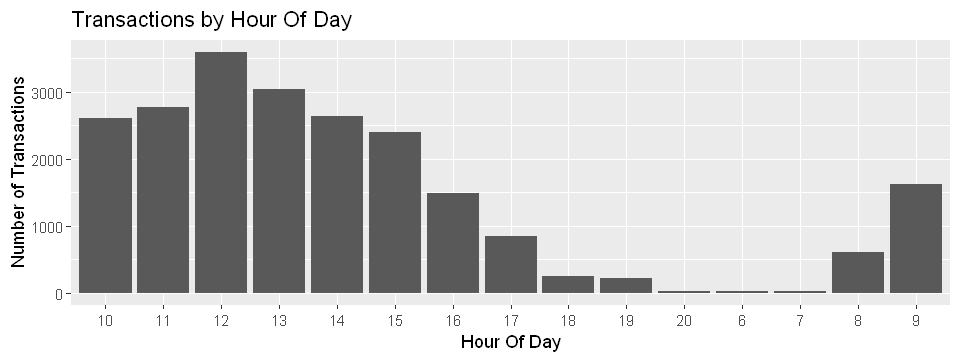

In [30]:
custData %>%
  group_by(hourOfDay) %>%
  summarise(revenue = sum(lineTotal)) %>%
  ggplot(aes(x = hourOfDay, y = revenue)) + geom_col() + labs(x = 'Hour Of Day', y = 'Revenue (£)', title = 'Revenue by Hour Of Day')

custData %>%
  group_by(hourOfDay) %>%
  summarise(transactions = n_distinct(InvoiceNo)) %>%
  ggplot(aes(x = hourOfDay, y = transactions)) + geom_col() + labs(x = 'Hour Of Day', y = 'Number of Transactions', title = 'Transactions by Hour Of Day')

 We have more transactions and more revenue in the morning to mid-afternoon, tailing of quickly towards the early evening.

## Country summary

In [31]:
#Analysis of our data from e-commerce retailer perspective in a number of countries around the world.
countrySummary <- custData %>%
  group_by(Country) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup() %>%
  arrange(desc(revenue))

head(countrySummary, n = 10)
unique(countrySummary$Country)

Country,revenue,transactions,aveOrdVal
United Kingdom,6767873.39,19857,340.83
Netherlands,284661.54,101,2818.43
EIRE,250285.22,319,784.59
Germany,221698.21,603,367.66
France,196712.84,458,429.50
Australia,137077.27,69,1986.63
Switzerland,55739.40,71,785.06
Spain,54774.58,105,521.66
Belgium,40910.96,119,343.79
Sweden,36595.91,46,795.56


[1] United Kingdom       Netherlands          EIRE                
 [4] Germany              France               Australia           
 [7] Switzerland          Spain                Belgium             
[10] Sweden               Japan                Norway              
[13] Portugal             Finland              Channel Islands     
[16] Denmark              Italy                Cyprus              
[19] Austria              Singapore            Poland              
[22] Israel               Greece               Iceland             
[25] Canada               Unspecified          Malta               
[28] United Arab Emirates USA                  Lebanon             
[31] Lithuania            European Community   Brazil              
[34] RSA                  Czech Republic       Bahrain             
[37] Saudi Arabia        
37 Levels: Australia Austria Bahrain Belgium Brazil Canada ... USA

In [32]:
#looking at the top five countries in terms of revenue contribution
countryCustSummary <- custData %>%
  group_by(Country) %>%
  summarise(revenue = sum(lineTotal), customers = n_distinct(CustomerID)) %>%
  mutate(aveCustVal = (round((revenue / customers),2))) %>%
  ungroup() %>%
  arrange(desc(revenue))

head(countryCustSummary, n = 10)

Country,revenue,customers,aveCustVal
United Kingdom,6767873.39,3950,1713.39
Netherlands,284661.54,9,31629.06
EIRE,250285.22,3,83428.41
Germany,221698.21,95,2333.67
France,196712.84,87,2261.07
Australia,137077.27,9,15230.81
Switzerland,55739.40,21,2654.26
Spain,54774.58,31,1766.92
Belgium,40910.96,25,1636.44
Sweden,36595.91,8,4574.49


In [33]:
topFiveCountries <- custData %>%
  filter(Country == 'Netherlands' | Country == 'EIRE' | Country == 'Germany' | Country == 'France' | Country == 'Australia')


In [34]:
topFiveCountrySummary <- topFiveCountries %>%
  group_by(Country, date) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo), customers = n_distinct(CustomerID)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup() %>%
  arrange(desc(revenue))

head(topFiveCountrySummary)


`summarise()` has grouped output by 'Country'. You can override using the `.groups` argument.


Country,date,revenue,transactions,customers,aveOrdVal
Netherlands,2011-10-20,25833.56,3,1,8611.19
Australia,2011-06-15,23426.81,2,1,11713.41
Australia,2011-08-18,21880.44,1,1,21880.44
Netherlands,2011-08-11,19150.66,1,1,19150.66
Netherlands,2011-02-21,18279.48,2,1,9139.74
Netherlands,2011-03-29,18247.50,2,1,9123.75


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


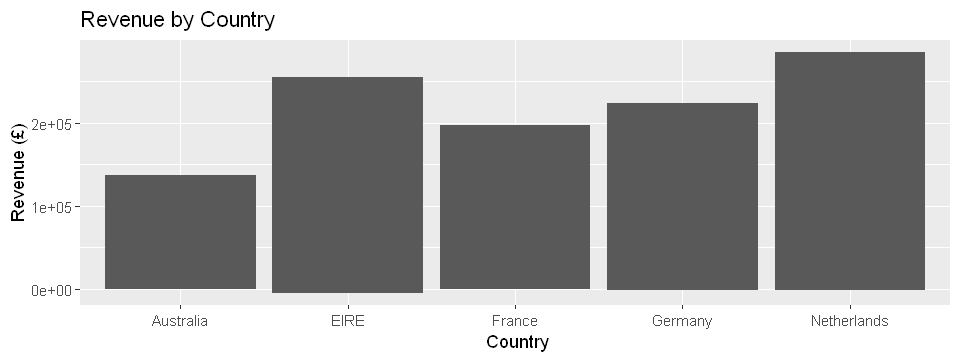

Warning message in self$trans$transform(x):
"NaNs produced"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 78 rows containing non-finite values (stat_boxplot)."

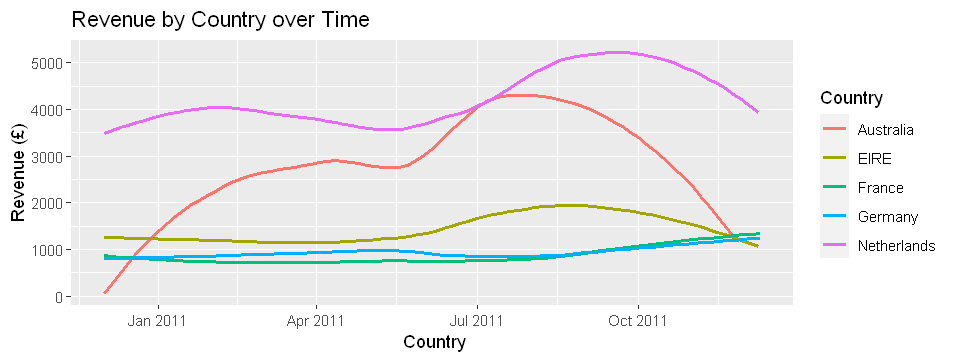

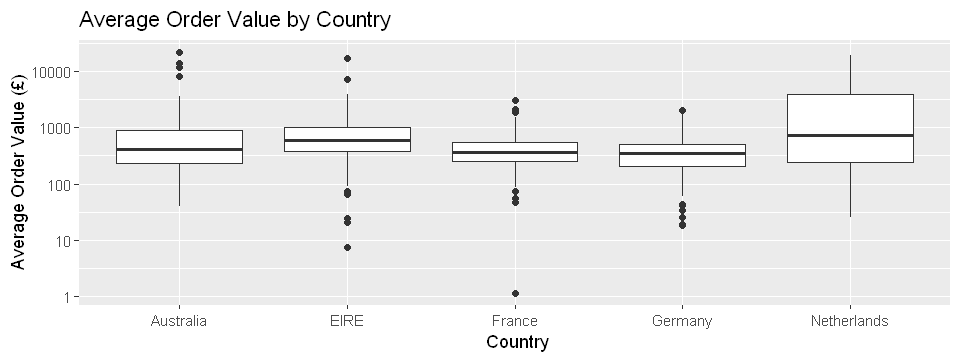

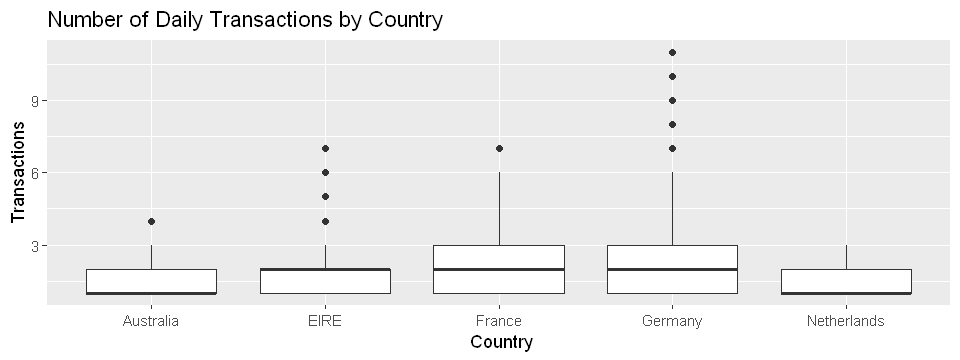

In [35]:
ggplot(topFiveCountrySummary, aes(x = Country, y = revenue)) + geom_col() + labs(x = ' Country', y = 'Revenue (£)', title = 'Revenue by Country')
ggplot(topFiveCountrySummary, aes(x = date, y = revenue, colour = Country)) + geom_smooth(method = 'auto', se = FALSE) + labs(x = ' Country', y = 'Revenue (£)', title = 'Revenue by Country over Time')
ggplot(topFiveCountrySummary, aes(x = Country, y = aveOrdVal)) + geom_boxplot() + labs(x = ' Country', y = 'Average Order Value (£)', title = 'Average Order Value by Country') + scale_y_log10()
ggplot(topFiveCountrySummary, aes(x = Country, y = transactions)) + geom_boxplot() + labs(x = ' Country', y = 'Transactions', title = 'Number of Daily Transactions by Country')

## Customer segmentation

In [36]:
custSummary <- custData %>%
  group_by(CustomerID) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup() %>%
  arrange(desc(revenue))

head(custSummary, n = 10)

CustomerID,revenue,transactions,aveOrdVal
14646,279489.02,77,3629.73
18102,256438.49,62,4136.10
17450,187482.17,55,3408.77
14911,132572.62,248,534.57
12415,123725.45,26,4758.67
14156,113384.14,66,1717.94
17511,88125.38,46,1915.77
16684,65892.08,31,2125.55
13694,62653.10,60,1044.22
15311,59419.34,118,503.55


Warning message in self$trans$transform(x):
"NaNs produced"Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 55 rows containing non-finite values (stat_bin)."

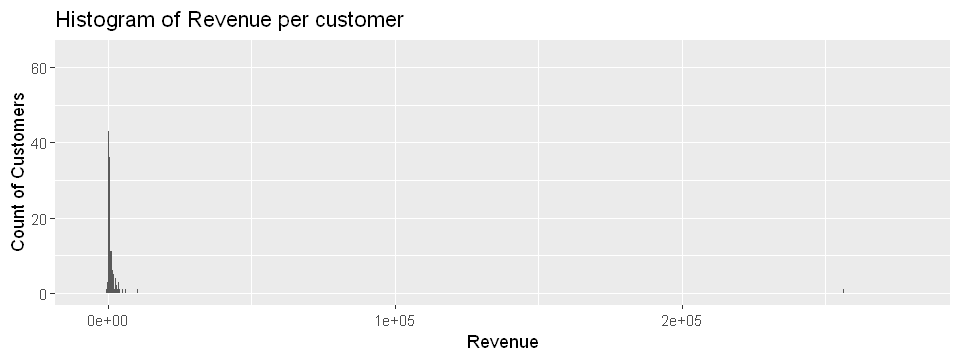

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


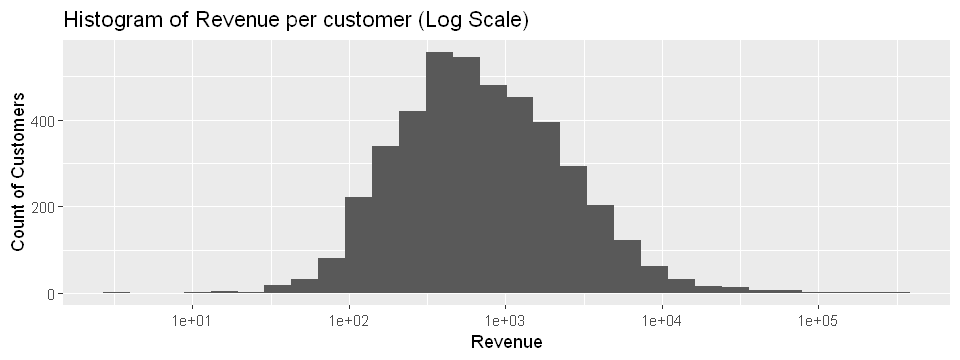

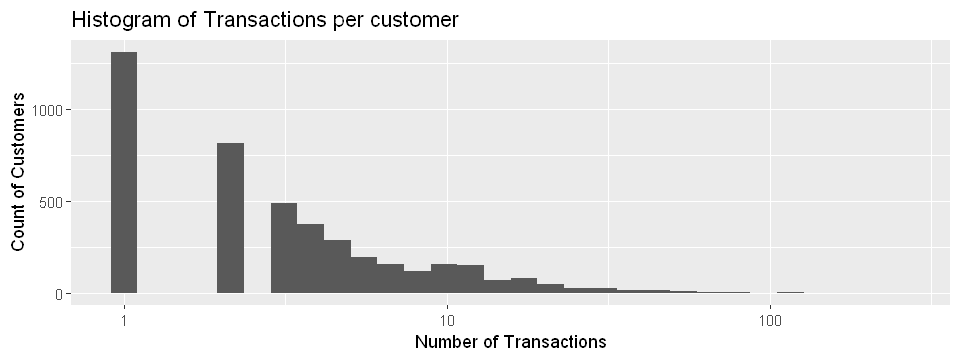

In [37]:
ggplot(custSummary, aes(revenue)) + geom_histogram(binwidth = 10) + labs(x = 'Revenue', y = 'Count of Customers', title = 'Histogram of Revenue per customer')
ggplot(custSummary, aes(revenue)) + geom_histogram() + scale_x_log10() + labs(x = 'Revenue', y = 'Count of Customers', title = 'Histogram of Revenue per customer (Log Scale)')
ggplot(custSummary, aes(transactions)) + geom_histogram() + scale_x_log10() + labs(x = 'Number of Transactions', y = 'Count of Customers', title = 'Histogram of Transactions per customer')

In [38]:
custSummaryB <- custData %>%
  group_by(CustomerID, InvoiceNo) %>%
  summarise(revenue = sum(lineTotal), transactions = n_distinct(InvoiceNo)) %>%
  mutate(aveOrdVal = (round((revenue / transactions),2))) %>%
  ungroup() %>%
  arrange(revenue) %>%
  mutate(cumsum=cumsum(revenue))

head(custSummaryB, n =10)

`summarise()` has grouped output by 'CustomerID'. You can override using the `.groups` argument.


CustomerID,InvoiceNo,revenue,transactions,aveOrdVal,cumsum
16446,C581484,-168469.60,1,-168469.60,-168469.6
12346,C541433,-77183.60,1,-77183.60,-245653.2
15098,C556445,-38970.00,1,-38970.00,-284623.2
15749,C550456,-22998.40,1,-22998.40,-307621.6
16029,C570556,-11816.64,1,-11816.64,-319438.2
12536,C573079,-8322.12,1,-8322.12,-327760.4
16029,C551685,-8142.75,1,-8142.75,-335903.1
16029,C551699,-6930.00,1,-6930.00,-342833.1
12744,C571750,-6068.06,1,-6068.06,-348901.2
14911,C562375,-4345.10,1,-4345.10,-353246.3


In [39]:
custData %>% filter(CustomerID == 16446)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,month,year,hourOfDay,dayOfWeek,lineTotal
553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,16446,United Kingdom,2011-05-18,9:52,5,2011,9,Wed,1.65
553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,16446,United Kingdom,2011-05-18,9:52,5,2011,9,Wed,1.25
581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom,2011-12-09,9:15,12,2011,9,Fri,168469.60
C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom,2011-12-09,9:27,12,2011,9,Fri,-168469.60


In [40]:
custSummaryB <- custData %>%
  group_by(InvoiceNo, CustomerID, Country, date, month, year, hourOfDay, dayOfWeek) %>%
  summarise(orderVal = sum(lineTotal)) %>%
  mutate(recent = Sys.Date() - date) %>%
  ungroup()

custSummaryB$recent <- as.character(custSummaryB$recent)
custSummaryB$recentDays <- sapply(custSummaryB$recent, FUN = function(x) {strsplit(x, split = '[ ]')[[1]][1]})
custSummaryB$recentDays <- as.integer(custSummaryB$recentDays)

head(custSummaryB, n = 5)

`summarise()` has grouped output by 'InvoiceNo', 'CustomerID', 'Country', 'date', 'month', 'year', 'hourOfDay'. You can override using the `.groups` argument.


InvoiceNo,CustomerID,Country,date,month,year,hourOfDay,dayOfWeek,orderVal,recent,recentDays
536365,17850,United Kingdom,2010-12-01,12,2010,8,Wed,139.12,3820,3820
536366,17850,United Kingdom,2010-12-01,12,2010,8,Wed,22.20,3820,3820
536367,13047,United Kingdom,2010-12-01,12,2010,8,Wed,278.73,3820,3820
536368,13047,United Kingdom,2010-12-01,12,2010,8,Wed,70.05,3820,3820
536369,13047,United Kingdom,2010-12-01,12,2010,8,Wed,17.85,3820,3820


In [41]:
customerBreakdown <- custSummaryB %>%
  group_by(CustomerID, Country) %>%
  summarise(orders = n_distinct(InvoiceNo), revenue = sum(orderVal), meanRevenue = round(mean(orderVal), 2), medianRevenue = median(orderVal), 
            mostDay = names(which.max(table(dayOfWeek))), mostHour = names(which.max(table(hourOfDay))),
           recency = min(recentDays))%>%
  ungroup()

head(customerBreakdown)


`summarise()` has grouped output by 'CustomerID'. You can override using the `.groups` argument.


CustomerID,Country,orders,revenue,meanRevenue,medianRevenue,mostDay,mostHour,recency
12346,United Kingdom,2,0.00,0.00,0.00,Tue,10,3772
12347,Iceland,7,4310.00,615.71,584.91,Tue,14,3449
12348,Finland,4,1797.24,449.31,338.50,Tue,10,3522
12349,Italy,1,1757.55,1757.55,1757.55,Mon,9,3465
12350,Norway,1,334.40,334.40,334.40,Wed,16,3757
12352,Norway,11,1545.41,140.49,160.33,Tue,14,3483


In [42]:
#Filter the dataframe
custBreakSum <- customerBreakdown %>%
  filter(orders > 1, revenue > 50)

head(custBreakSum)
dim(custBreakSum)

CustomerID,Country,orders,revenue,meanRevenue,medianRevenue,mostDay,mostHour,recency
12347,Iceland,7,4310.00,615.71,584.91,Tue,14,3449
12348,Finland,4,1797.24,449.31,338.50,Tue,10,3522
12352,Norway,11,1545.41,140.49,160.33,Tue,14,3483
12356,Portugal,3,2811.43,937.14,481.46,Tue,12,3469
12358,Austria,2,1168.06,584.03,584.03,Tue,10,3448
12359,Cyprus,6,6245.53,1040.92,828.41,Wed,12,3454


[1] 3032    9

In [43]:
#We've created a dataframe that gives us a list of repeat customers and tells us their country, how many orders they have made, total revenue and average order value as well as the day of the week and the time of the day they most frequently place orders.
#install.packages("heatmaply")

In [44]:
install.packages("ploty")

Warning message:
"package 'ploty' is not available (for R version 3.6.1)"

In [45]:
library(heatmaply)

Warning message:
"package 'heatmaply' was built under R version 3.6.3"Loading required package: plotly
Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Loading required package: viridis
Warning message:
"package 'viridis' was built under R version 3.6.3"Loading required package: viridisLite
Warning message:
"package 'viridisLite' was built under R version 3.6.3"
Welcome to heatmaply version 1.2.1

Type citation('heatmaply') for how to cite the package.
Type ?heatmaply for the main documentation.

The github page is: https://github.com/talgalili/heatmaply/
Please submit your suggestions and bug-reports at: https://github.com/talgalili/heatmaply/issues
Or contact: <tal.galili@gmail.com>



In [46]:
custMat <- custBreakSum %>%
  select(recency, revenue, meanRevenue, medianRevenue, orders) %>%
  as.matrix()

rownames(custMat) <- custBreakSum$CustomerID

head(custMat)
class(custMat)

,recency,revenue,meanRevenue,medianRevenue,orders
12347,3449,4310.00,615.71,584.91,7
12348,3522,1797.24,449.31,338.50,4
12352,3483,1545.41,140.49,160.33,11
12356,3469,2811.43,937.14,481.46,3
12358,3448,1168.06,584.03,584.03,2
12359,3454,6245.53,1040.92,828.41,6


[1] "matrix"

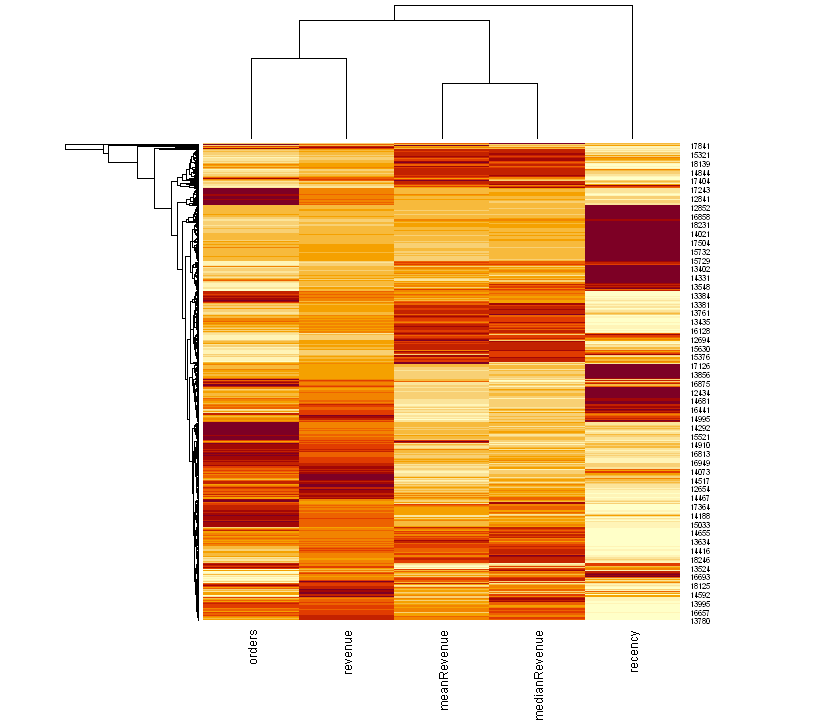

In [47]:
options(repr.plot.width=7, repr.plot.height=6)
heatmap(scale(custMat), cexCol = 0.7)

Looking at the heatmap, we can see that the total revenue clusters with the number of orders as we would expect, that the mean and median order values cluster together, again, as expected, and that the order recency sits in its own group. However, the main point of interest here is how the rows (customers) cluster


## Summary & Conclusion


This dataset offers myriad opportunities for practising skills in e-commerce sales analysis and customer segmentation. There are some other variables it would be nice to have in the dataset such as categories for the products. Additionally, before performing analysis it would be important to talk with the e-commerce team to understand the business and its customers and its strategic and tactical objectives. Knowing what the business wants to achieve, and what questions it has are central to performing a relevant analysis that generates actionable insight.

## Future Aspects

There is still a lot more that we can do with this dataset. We haven't looked at the frequency of purchases, and we've not looked at the products. While a simple 'product category' variable would have been very useful. We may well be able to extract some additional features from the description field with some text analysis, and we could look at using the stock code, perhaps using PCA to reduce the dimensionality.